In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [2]:
from prophet import Prophet

In [3]:
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Trivial Forecast (rolling mean)

In [5]:
df = pd.DataFrame({'X': np.arange(0,10)}) # generate an input df
df['y']=df.rolling(3).mean() # take the window and write the average as the result

In [6]:
df

,X,y
0,0,NaN
1,1,NaN
2,2,1.0
3,3,2.0
4,4,3.0
5,5,4.0
6,6,5.0
7,7,6.0
8,8,7.0
9,9,8.0


# Small data set

In [7]:
df_all = pd.read_csv(r"..\data\processed\COVID_small_flat_table.csv", sep=';')
df=df_all[['date','Germany']]
df=df.rename(columns={'date': 'ds',
                      'Germany': 'y'})

In [8]:
df_all

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3
...,...,...,...,...,...,...
909,2022-07-19,20299013,89830497,13132159,29994679,18937971
910,2022-07-20,20385814,90046261,13132159,30131303,19009080
911,2022-07-21,20467349,90200438,13132159,30239122,19077659
912,2022-07-22,20539016,90367064,13204863,30331131,19146180


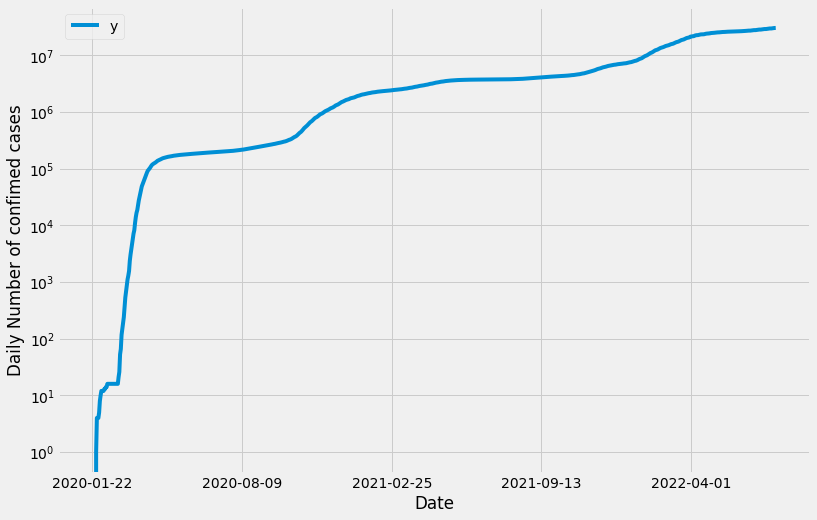

In [9]:
ax = df.set_index('ds').plot(figsize=(12, 8),
                             logy=True)
ax.set_ylabel('Daily Number of confimed cases')
ax.set_xlabel('Date')

plt.show()

In [10]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

#my_model = Prophet(interval_width=0.95) # piecwise linear model
my_model = Prophet(growth='logistic')   # logistic model

In [11]:
df['cap']=1000000.
my_model.fit(df)

02:06:34 - cmdstanpy - INFO - Chain [1] start processing
02:06:35 - cmdstanpy - INFO - Chain [1] done processing


In [12]:

# define the periods and the frequency 'D'== days

future_dates = my_model.make_future_dataframe(periods=7, freq='D')
future_dates['cap']=1000000. # only mandatory for the logistic model
future_dates.tail()

,ds,cap
916,2022-07-26,1000000.0
917,2022-07-27,1000000.0
918,2022-07-28,1000000.0
919,2022-07-29,1000000.0
920,2022-07-30,1000000.0


In [13]:
# predict according to the scikit-learn standard

forecast = my_model.predict(future_dates)

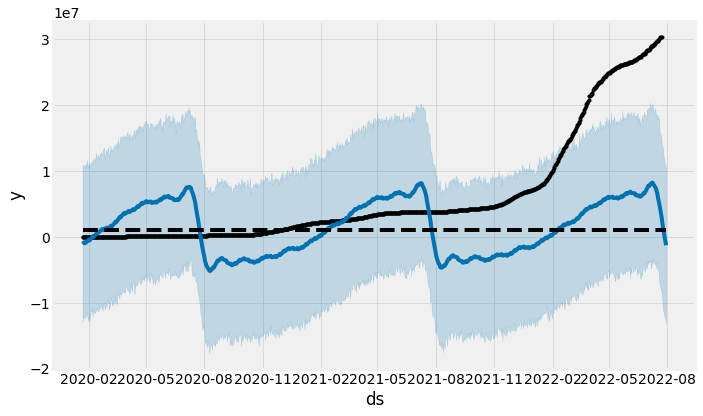

In [14]:
my_model.plot(forecast,
              uncertainty=True ); # since fbprohet is rendering the output

In [15]:
import plotly.offline as py
from prophet.plot import plot_plotly

fig = plot_plotly(my_model, forecast)  # This returns a plotly Figure

fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])
py.iplot(fig)

In [16]:
forecast.sort_values(by='ds').head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,131190.854259,1000000.0,-1.292358e+07,1.061594e+07,131190.854259,131190.854259,-1.191121e+06,-1.191121e+06,-1.191121e+06,-180.865775,-180.865775,-180.865775,-1.190940e+06,-1.190940e+06,-1.190940e+06,0.0,0.0,0.0,-1.059930e+06
1,2020-01-23,132342.540140,1000000.0,-1.185842e+07,1.096797e+07,132342.540140,132342.540140,-1.101407e+06,-1.101407e+06,-1.101407e+06,41076.725475,41076.725475,41076.725475,-1.142484e+06,-1.142484e+06,-1.142484e+06,0.0,0.0,0.0,-9.690647e+05
2,2020-01-24,133502.782763,1000000.0,-1.226642e+07,1.079437e+07,133502.782763,133502.782763,-1.018059e+06,-1.018059e+06,-1.018059e+06,76761.869168,76761.869168,76761.869168,-1.094821e+06,-1.094821e+06,-1.094821e+06,0.0,0.0,0.0,-8.845560e+05
3,2020-01-25,134671.618399,1000000.0,-1.238041e+07,1.088710e+07,134671.618399,134671.618399,-9.445121e+05,-9.445121e+05,-9.445121e+05,102741.151314,102741.151314,102741.151314,-1.047253e+06,-1.047253e+06,-1.047253e+06,0.0,0.0,0.0,-8.098404e+05
4,2020-01-26,135849.082980,1000000.0,-1.208615e+07,1.041805e+07,135849.082980,135849.082980,-1.093595e+06,-1.093595e+06,-1.093595e+06,-94530.803420,-94530.803420,-94530.803420,-9.990641e+05,-9.990641e+05,-9.990641e+05,0.0,0.0,0.0,-9.577459e+05


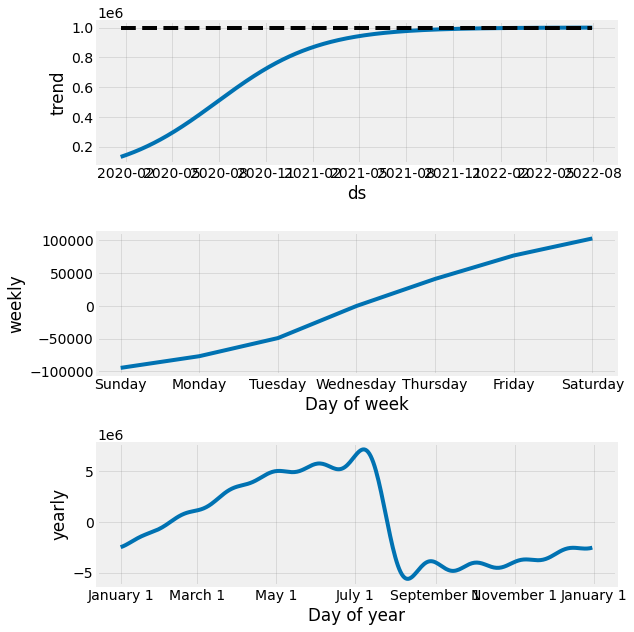

In [17]:
my_model.plot_components(forecast);

<AxesSubplot:xlabel='ds'>

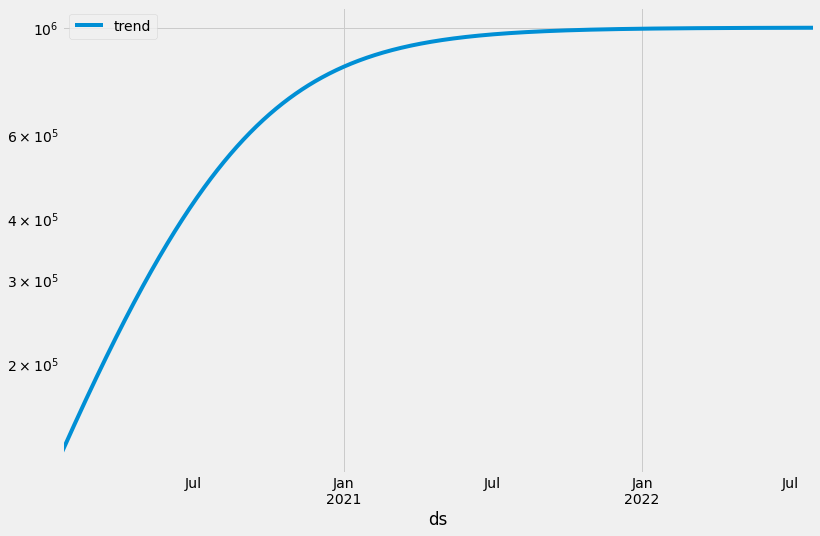

In [18]:
forecast[['ds','trend']].set_index('ds').plot(figsize=(12, 8),logy=True)

# Cross-Validation

In [19]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, 
                         initial='40 days', # we take the first 30 days for training
                         period='1 days',  # every  days a new prediction run
                         horizon = '7 days') #we predict 7days into the future

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/867 [00:00<?, ?it/s]

02:07:05 - cmdstanpy - INFO - Chain [1] start processing
02:07:21 - cmdstanpy - INFO - Chain [1] done processing
02:07:23 - cmdstanpy - INFO - Chain [1] start processing
02:07:50 - cmdstanpy - INFO - Chain [1] done processing
02:07:51 - cmdstanpy - INFO - Chain [1] start processing
02:08:16 - cmdstanpy - INFO - Chain [1] done processing
02:08:18 - cmdstanpy - INFO - Chain [1] start processing
02:08:32 - cmdstanpy - INFO - Chain [1] done processing
02:08:34 - cmdstanpy - INFO - Chain [1] start processing
02:09:20 - cmdstanpy - INFO - Chain [1] done processing
02:09:22 - cmdstanpy - INFO - Chain [1] start processing
02:09:40 - cmdstanpy - INFO - Chain [1] done processing
02:09:42 - cmdstanpy - INFO - Chain [1] start processing
02:09:53 - cmdstanpy - INFO - Chain [1] done processing
02:09:54 - cmdstanpy - INFO - Chain [1] start processing
02:10:15 - cmdstanpy - INFO - Chain [1] done processing
02:10:16 - cmdstanpy - INFO - Chain [1] start processing
02:10:33 - cmdstanpy - INFO - Chain [1]

In [20]:
df_cv.sort_values(by=['cutoff','ds'])[0:12]
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,209.497127,206.856045,211.947900,188,2020-03-02
1,2020-03-04,278.613218,275.599954,281.520803,240,2020-03-02
2,2020-03-05,362.477181,358.796015,366.295940,349,2020-03-02
3,2020-03-06,465.973276,460.916274,471.115007,534,2020-03-02
4,2020-03-07,583.659417,577.118769,590.962172,684,2020-03-02


In [21]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [22]:
# the performance matrix shows the result for all horizon
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,8.410320e+13,9.170780e+06,5.091254e+06,0.471314,0.573177,0.771477,0.074971
1,2 days,8.870826e+13,9.418506e+06,5.249178e+06,0.490022,0.595674,0.815068,0.036909
2,3 days,9.343436e+13,9.666145e+06,5.407369e+06,0.508312,0.621139,0.859763,0.021915
3,4 days,9.823228e+13,9.911220e+06,5.564346e+06,0.527303,0.643290,0.906278,0.013841
4,5 days,1.030494e+14,1.015133e+07,5.718687e+06,0.546797,0.665612,0.954219,0.008074
5,6 days,1.078311e+14,1.038418e+07,5.868990e+06,0.565732,0.684788,1.000004,0.008074
6,7 days,1.125165e+14,1.060738e+07,6.013878e+06,0.584943,0.704922,1.039946,0.004614


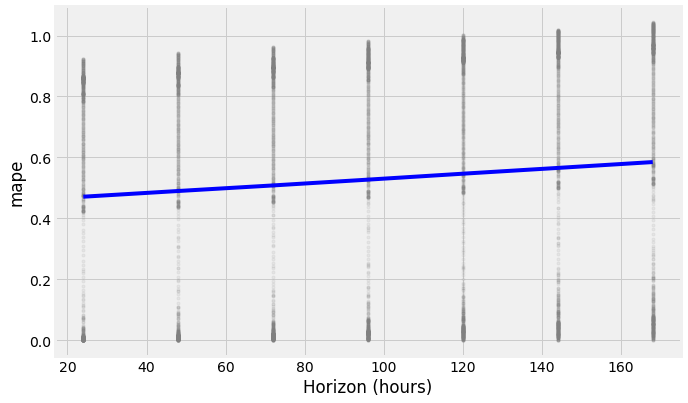

In [23]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',)

# Diagonalplot

In [24]:
horizon='7 days'
df_cv['horizon']=df_cv.ds-df_cv.cutoff

date_vec=df_cv[df_cv['horizon']==horizon]['ds']
y_hat=df_cv[df_cv['horizon']==horizon]['yhat']
y=df_cv[df_cv['horizon']==horizon]['y']

In [25]:
df_cv_7=df_cv[df_cv['horizon']==horizon]
df_cv_7.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,horizon
6040,2022-07-19,-1.004511e+06,-1.219178e+07,9.871513e+06,29994679,2022-07-12,7 days
6047,2022-07-20,-1.010952e+06,-1.263901e+07,9.807116e+06,30131303,2022-07-13,7 days
6054,2022-07-21,-1.023249e+06,-1.233417e+07,9.522021e+06,30239122,2022-07-14,7 days
6061,2022-07-22,-1.047978e+06,-1.233158e+07,9.884039e+06,30331131,2022-07-15,7 days
6068,2022-07-23,-1.067393e+06,-1.304818e+07,1.041607e+07,30331133,2022-07-16,7 days


In [26]:
type(df_cv['horizon'][0])

pandas._libs.tslibs.timedeltas.Timedelta

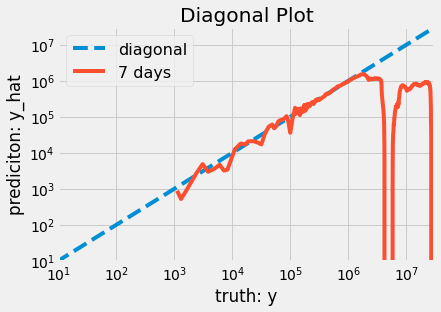

In [27]:
fig, ax = plt.subplots(1, 1)


ax.plot(np.arange(max(y)),np.arange(max(y)),'--',label='diagonal')
ax.plot(y,y_hat,'-',label=horizon)  # horizon is a np.timedelta objct

ax.set_title('Diagonal Plot')
ax.set_ylim(10, max(y))

ax.set_xlabel('truth: y')
ax.set_ylabel('prediciton: y_hat')
ax.set_yscale('log')

ax.set_xlim(10, max(y))
ax.set_xscale('log')
ax.legend(loc='best',
           prop={'size': 16});

# Trivial Forecast

In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    ''' MAPE calculation '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
parse_dates=['date']
df_all = pd.read_csv(r"..\data\processed\COVID_small_flat_table.csv", sep=';', parse_dates=parse_dates)
df_trivial=df_all[['date','Germany']]
df_trivial=df_trivial.rename(columns={'date': 'ds','Germany': 'y'})

In [32]:
df_trivial['y_mean_r3']=df_trivial.y.rolling(3).mean() # take the average of 3 days

In [33]:
df_trivial['cutoff']=df_trivial['ds'].shift(7)
df_trivial['y_hat']=df_trivial['y_mean_r3'].shift(7)
df_trivial['horizon']=df_trivial['ds']-df_trivial['cutoff']
print('MAPE: '+str(mean_absolute_percentage_error(df_trivial['y_hat'].iloc[12:,], df_trivial['y'].iloc[12:,])))
df_trivial

MAPE: 35.48139500743281


,ds,y,y_mean_r3,cutoff,y_hat,horizon
0,2020-01-22,0,NaN,NaT,NaN,NaT
1,2020-01-23,0,NaN,NaT,NaN,NaT
2,2020-01-24,0,0.000000e+00,NaT,NaN,NaT
3,2020-01-25,0,0.000000e+00,NaT,NaN,NaT
4,2020-01-26,0,0.000000e+00,NaT,NaN,NaT
...,...,...,...,...,...,...
909,2022-07-19,29994679,2.984712e+07,2022-07-12,2.917145e+07,7 days
910,2022-07-20,30131303,2.999322e+07,2022-07-13,2.931628e+07,7 days
911,2022-07-21,30239122,3.012170e+07,2022-07-14,2.944610e+07,7 days
912,2022-07-22,30331131,3.023385e+07,2022-07-15,2.957439e+07,7 days
